### Dataset diabete

### Preprocessing

In [1]:
import models
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, f1_score, recall_score, accuracy_score
)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


file_path="diabetes_binary_health_indicators_BRFSS2015.csv"

X_train,X_test,y_train,y_test=models.preprocess_diabetes_data(file_path)




## Logistic Regression

F1-score Train : 0.45
F1-score Test  : 0.45

Classification Report - Test :

              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.76      0.45      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895



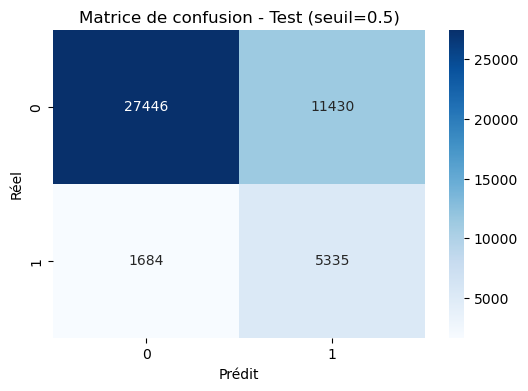

In [3]:
models.logistic_regression_model(X_train, X_test, y_train, y_test)

## KNN


Entraînement du modèle...

--- Résultats (SEUIL PAR DÉFAUT = 0.5) ---
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38876
         1.0       0.42      0.15      0.22      7019

    accuracy                           0.84     45895
   macro avg       0.64      0.56      0.57     45895
weighted avg       0.80      0.84      0.81     45895

ROC-AUC : 0.7468984186514398

Seuil optimal trouvé : 0.23644842756597242

--- Résultats (SEUIL OPTIMAL) ---
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84     38876
         1.0       0.33      0.58      0.42      7019

    accuracy                           0.76     45895
   macro avg       0.62      0.68      0.63     45895
weighted avg       0.82      0.76      0.78     45895

ROC-AUC : 0.7468984186514398
Matrice de confusion avec seuil optimal :
 [[30580  8296]
 [ 2948  4071]]


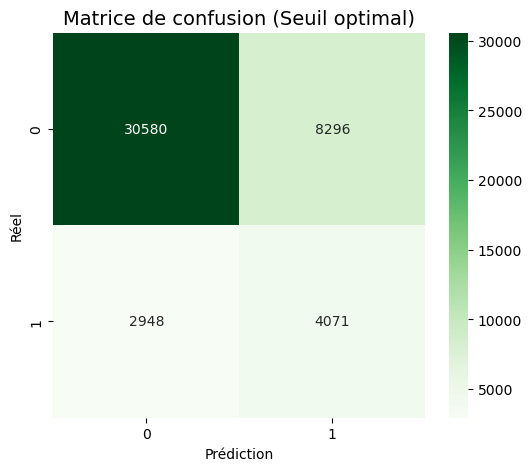

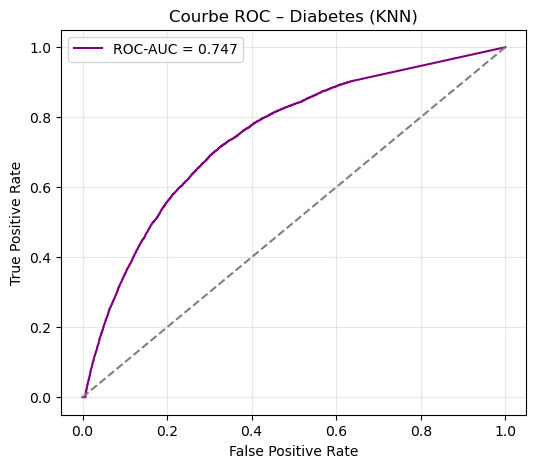

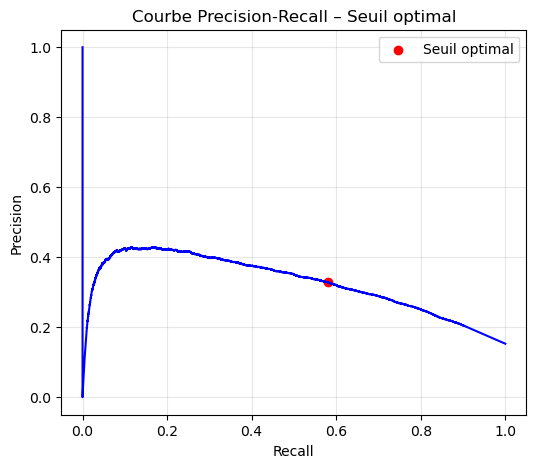

In [2]:
models.KNN_model_dataset2(X_train, X_test, y_train, y_test)

## Random Forest

/opt/anaconda3/envs/MLT/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best threshold : 0.400
Accuracy : 0.8137
F1-score (classe 1) : 0.3293

Classification Report:

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     38876
         1.0       0.37      0.30      0.33      7019

    accuracy                           0.81     45895
   macro avg       0.62      0.60      0.61     45895
weighted avg       0.80      0.81      0.81     45895



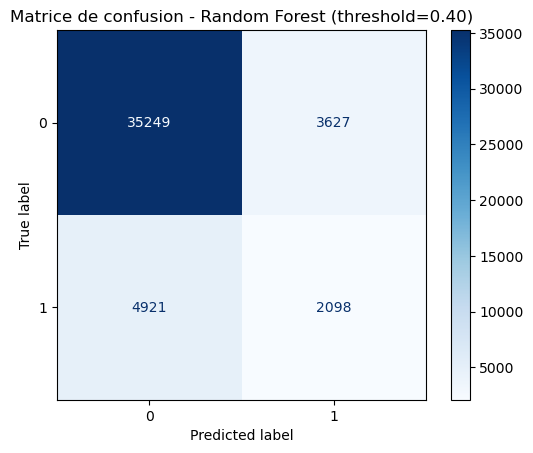

(RandomForestClassifier(n_estimators=250, random_state=42), np.float64(0.4))

In [2]:
models.random_forest_model(X_train, X_test, y_train, y_test)

## MLP with Pytorch

In [8]:
models.MLP_pytorch_model(X_train, X_test, y_train, y_test)

Ratio négatif/positif: 5.538179357504096
Epoch [10/1000], Loss: 1.1027
Epoch [20/1000], Loss: 1.0886
Epoch [30/1000], Loss: 1.0829
Epoch [40/1000], Loss: 1.0787
Epoch [50/1000], Loss: 1.0754
Epoch [60/1000], Loss: 1.0734
Epoch [70/1000], Loss: 1.0727
Epoch [80/1000], Loss: 1.0723
Epoch [90/1000], Loss: 1.0720
Epoch [100/1000], Loss: 1.0719
Epoch [110/1000], Loss: 1.0717
Epoch [120/1000], Loss: 1.0716
Epoch [130/1000], Loss: 1.0715
Epoch [140/1000], Loss: 1.0714
Epoch [150/1000], Loss: 1.0713
Epoch [160/1000], Loss: 1.0713
Epoch [170/1000], Loss: 1.0712
Epoch [180/1000], Loss: 1.0712
Epoch [190/1000], Loss: 1.0711
Epoch [200/1000], Loss: 1.0711
Epoch [210/1000], Loss: 1.0710
Epoch [220/1000], Loss: 1.0710
Epoch [230/1000], Loss: 1.0710
Epoch [240/1000], Loss: 1.0709
Epoch [250/1000], Loss: 1.0709
Epoch [260/1000], Loss: 1.0709
Epoch [270/1000], Loss: 1.0709
Epoch [280/1000], Loss: 1.0709
Epoch [290/1000], Loss: 1.0708
Epoch [300/1000], Loss: 1.0708
Epoch [310/1000], Loss: 1.0708
Epoch [

L’analyse des différents modèles appliqués au dataset Diabetes Health Indicators met en évidence la difficulté principale de cette problématique : le fort déséquilibre entre les classes (≈ 85 % de non-diabétiques pour seulement 15 % de diabétiques). Ce déséquilibre complique la détection correcte de la classe minoritaire, qui est pourtant la plus pertinente d’un point de vue médical. Il est donc indispensable de ne pas se limiter à l’accuracy, mais d’examiner finement le recall et le F1-score de la classe 1.

La régression logistique se distingue par son excellent rappel pour la classe 1 (0.76), ce qui en fait le meilleur modèle en termes de détection des personnes diabétiques. Elle parvient à identifier la majorité des cas positifs, tout en restant relativement stable (F1 train = F1 test = 0.45). Cependant, cette performance se fait au prix d’une faible précision (0.32 pour la classe 1), ce qui implique un nombre élevé de faux positifs. Le modèle est donc conservateur : il “préfère” signaler trop de personnes comme diabétiques plutôt que passer à côté de cas réels.

Le KNN avec seuil optimal offre un compromis intéressant : il améliore l’accuracy globale (0.76) et réduit le nombre de faux positifs par rapport à la régression logistique. Son rappel pour la classe 1 est plus faible (0.58), mais reste supérieur à celui de modèles plus complexes comme le Random Forest. Grâce à l’ajustement du seuil, il trouve un meilleur équilibre entre rappel et précision, même si son F1-score (0.42 pour la classe 1) demeure légèrement inférieur à celui de la logistic regression et du MLP.

Le Random Forest, malgré une accuracy élevée (0.81), est clairement le modèle le moins adapté pour détecter les diabétiques. Avec un rappel de seulement 0.30 pour la classe 1, il échoue à identifier une grande partie des cas positifs. Le modèle est très performant pour la classe majoritaire (non diabétiques), mais cette performance masque sa faible capacité à traiter la classe minoritaire. Cela confirme que l’accuracy ne doit pas être utilisée seule comme indicateur sur un dataset déséquilibré.

Enfin, le MLP (réseau de neurones) apparaît comme le modèle le plus équilibré. Il atteint un recall de 0.64 pour la classe 1, supérieur à celui du KNN et du Random Forest, et une précision raisonnable (0.36). Son F1-score pour la classe 1 (0.47) est le meilleur parmi tous les modèles, ce qui montre qu’il gère efficacement le compromis entre faux positifs et faux négatifs. L’accuracy globale (0.77) est également bonne, ce qui place ce modèle comme l’option la plus harmonieuse.

Conclusion générale
	•	La régression logistique est la meilleure pour maximiser le recall (détection des diabétiques).
	•	Le Random Forest est le plus précis pour la classe majoritaire, mais très mauvais pour détecter la classe minoritaire → modèle à éviter pour cette tâche.
	•	Le KNN (avec seuil optimal) atteint un compromis correct mais reste limité par la structure du dataset.
	•	Le MLP offre la meilleure performance globale, avec le meilleur équilibre entre précision, rappel et F1-score pour la classe 1.

Ainsi, le MLP apparaît comme le modèle le plus adapté pour ce problème, particulièrement lorsqu’on cherche à concilier performance générale et bonne détection des cas de diabète, tout en maîtrisant le nombre de faux positifs.